In [115]:
import os
import json, codecs
import string
import nltk
from nltk import word_tokenize, FreqDist, bigrams, trigrams
from nltk.corpus import stopwords
import pandas as pd 

In [11]:
os.getcwd()

'C:\\Users\\Keerthana\\Documents\\Python Scripts'

In [36]:
df = pd.read_excel("C:/Users/Keerthana/Downloads/train.xlsx")

In [3]:
df.head()

,title,author,date,read_time,shares,content,category
6789,The Unintended Consequences of Leaving Healthc...,Ed Dolan,Aug 27,5,128.0,With the failure of repeal and replace at the ...,2
7886,"Wyatt Lindquist: Frisbee Enthusiast, Entrepreneur",The Edge of Adulthood,Sep 27,3,148.0,Illustration: Shannon WrightIllustration: Shan...,1
4488,"Peter Viertel - Novelist, Screenwriter, with D...",Steve Newman Writer,Jun 16,4,118.0,"Peter Viertel’s 1992 memoir, Dangerous Friends...",0
8298,Why I chose customer-funded growth over taking...,Aytekin Tank,Aug 7,6,3500.0,It’s the first page in a familiar story. A col...,1
8343,How The Best Leaders Get Truly Honest Feedback...,Robert Glazer,Aug 3,4,42.0,The purpose of giving feedback to someone is t...,1


In [11]:
count_row = df.shape[0] 
count_row

8634

In [37]:
df['tokens'] = df['content'].dropna().apply(word_tokenize)

In [52]:
df.tokens[1:1000]

7886     [Illustration, :, Shannon, WrightIllustration,...
4488     [Peter, Viertel, ’, s, 1992, memoir, ,, Danger...
8298     [It, ’, s, the, first, page, in, a, familiar, ...
8343     [The, purpose, of, giving, feedback, to, someo...
11444                                                  NaN
7133     [Trust, or, Distrust, Drives, Social, GroupsRa...
8096     [Credit, :, tangi, bertin, via, flickr/CC, BY,...
7945     [People, point, to, two, main, risks, when, co...
2185     [That, ’, s, it, ., The, Kevin, Roose, article...
9158     [By, Shannon, StironeRunning, low, on, fuel, ,...
9897     [Smartphones, are, one, of, the, most, amazing...
7252     [By, Leonid, BershidskyFacebook, ’, s, widely,...
237      [I, was, recently, asked, ,, “, what, should, ...
179      [By, Lara, SeligmanPeople, who, form, their, i...
2652     [With, more, and, more, companies, jumping, on...
1972     [Last, week, ,, BlackBerry, announced, that, J...
8954     [Early, March, was, filled, with, headlines, l.

In [38]:
df['ntokens'] = df['tokens'].dropna().apply(lambda x: ', '.join(map(str, x)))

In [19]:
df.ntokens[1:100]

7886     Illustration, :, Shannon, WrightIllustration, ...
4488     Peter, Viertel, ’, s, 1992, memoir, ,, Dangero...
8298     It, ’, s, the, first, page, in, a, familiar, s...
8343     The, purpose, of, giving, feedback, to, someon...
11444                                                  NaN
7133     Trust, or, Distrust, Drives, Social, GroupsRac...
8096     Credit, :, tangi, bertin, via, flickr/CC, BY, ...
7945     People, point, to, two, main, risks, when, con...
2185     That, ’, s, it, ., The, Kevin, Roose, article,...
9158     By, Shannon, StironeRunning, low, on, fuel, ,,...
9897     Smartphones, are, one, of, the, most, amazing,...
7252     By, Leonid, BershidskyFacebook, ’, s, widely, ...
237      I, was, recently, asked, ,, “, what, should, a...
179      By, Lara, SeligmanPeople, who, form, their, id...
2652     With, more, and, more, companies, jumping, on,...
1972     Last, week, ,, BlackBerry, announced, that, Jo...
8954     Early, March, was, filled, with, headlines, li.

In [39]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [40]:
df['tokens_nop'] = df['ntokens'].dropna().apply(remove_punctuations)
df.tokens_nop[1:100]

7886     Illustration  Shannon WrightIllustration  Shan...
4488     Peter Viertel ’ s 1992 memoir  Dangerous Frien...
8298     It ’ s the first page in a familiar story  A c...
8343     The purpose of giving feedback to someone is t...
11444                                                  NaN
7133     Trust or Distrust Drives Social GroupsRacial a...
8096     Credit  tangi bertin via flickrCC BY 20Credit ...
7945     People point to two main risks when considerin...
2185     That ’ s it  The Kevin Roose article in the Ne...
9158     By Shannon StironeRunning low on fuel  NASA ’ ...
9897     Smartphones are one of the most amazing advanc...
7252     By Leonid BershidskyFacebook ’ s widely public...
237      I was recently asked  “ what should an organis...
179      By Lara SeligmanPeople who form their ideas ab...
2652     With more and more companies jumping on the au...
1972     Last week  BlackBerry announced that John Chen...
8954     Early March was filled with headlines like “ H.

In [31]:
df.head()

,title,author,date,read_time,shares,content,category,tokens,new_col,ntokens,tokens_nop
6789,The Unintended Consequences of Leaving Healthc...,Ed Dolan,Aug 27,5,128.0,With the failure of repeal and replace at the ...,2,"[With, the, failure, of, repeal, and, replace,...","With, the, failure, of, repeal, and, replace, ...","With, the, failure, of, repeal, and, replace, ...",With the failure of repeal and replace at the ...
7886,"Wyatt Lindquist: Frisbee Enthusiast, Entrepreneur",The Edge of Adulthood,Sep 27,3,148.0,Illustration: Shannon WrightIllustration: Shan...,1,"[Illustration, :, Shannon, WrightIllustration,...","Illustration, :, Shannon, WrightIllustration, ...","Illustration, :, Shannon, WrightIllustration, ...",Illustration Shannon WrightIllustration Shan...
4488,"Peter Viertel - Novelist, Screenwriter, with D...",Steve Newman Writer,Jun 16,4,118.0,"Peter Viertel’s 1992 memoir, Dangerous Friends...",0,"[Peter, Viertel, ’, s, 1992, memoir, ,, Danger...","Peter, Viertel, ’, s, 1992, memoir, ,, Dangero...","Peter, Viertel, ’, s, 1992, memoir, ,, Dangero...",Peter Viertel ’ s 1992 memoir Dangerous Frien...
8298,Why I chose customer-funded growth over taking...,Aytekin Tank,Aug 7,6,3500.0,It’s the first page in a familiar story. A col...,1,"[It, ’, s, the, first, page, in, a, familiar, ...","It, ’, s, the, first, page, in, a, familiar, s...","It, ’, s, the, first, page, in, a, familiar, s...",It ’ s the first page in a familiar story A c...
8343,How The Best Leaders Get Truly Honest Feedback...,Robert Glazer,Aug 3,4,42.0,The purpose of giving feedback to someone is t...,1,"[The, purpose, of, giving, feedback, to, someo...","The, purpose, of, giving, feedback, to, someon...","The, purpose, of, giving, feedback, to, someon...",The purpose of giving feedback to someone is t...


In [41]:
df['tokens_lower'] = df.tokens_nop.str.lower() 

In [23]:
df.tokens_lower[1:100]

7886     illustration  shannon wrightillustration  shan...
4488     peter viertel ’ s 1992 memoir  dangerous frien...
8298     it ’ s the first page in a familiar story  a c...
8343     the purpose of giving feedback to someone is t...
11444                                                  NaN
7133     trust or distrust drives social groupsracial a...
8096     credit  tangi bertin via flickrcc by 20credit ...
7945     people point to two main risks when considerin...
2185     that ’ s it  the kevin roose article in the ne...
9158     by shannon stironerunning low on fuel  nasa ’ ...
9897     smartphones are one of the most amazing advanc...
7252     by leonid bershidskyfacebook ’ s widely public...
237      i was recently asked  “ what should an organis...
179      by lara seligmanpeople who form their ideas ab...
2652     with more and more companies jumping on the au...
1972     last week  blackberry announced that john chen...
8954     early march was filled with headlines like “ h.

In [42]:
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
df['tokens_nostop'] = df['tokens_lower'].dropna().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 

In [26]:
df.tokens_nostop[1:100]

7886     illustration shannon wrightillustration shanno...
4488     peter viertel ’ 1992 memoir dangerous friends ...
8298     ’ first page familiar story college kid comes ...
8343     purpose giving feedback someone help person im...
11444                                                  NaN
7133     trust distrust drives social groupsracial ethn...
8096     credit tangi bertin via flickrcc 20credit tang...
7945     people point two main risks considering join s...
2185     ’ kevin roose article new york times ’ time le...
9158     shannon stironerunning low fuel nasa ’ dawn mi...
9897     smartphones one amazing advances history argum...
7252     leonid bershidskyfacebook ’ widely publicized ...
237      recently asked “ organisation aware looking us...
179      lara seligmanpeople form ideas us military bas...
2652     companies jumping autonomous vehicle bandwagon...
1972     last week blackberry announced john chen ceo g...
8954     early march filled headlines like “ animals ki.

In [46]:
wnl = nltk.WordNetLemmatizer()
def lemma_text(sentence):
    tokens = sentence.split()
    lemmatized_tokens = [wnl.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [47]:
df['tokens_lemmatized'] = df['tokens_nostop'].dropna().apply(lemma_text)

In [29]:
df.tokens_lemmatized[1:100]

7886     illustration shannon wrightillustration shanno...
4488     peter viertel ’ 1992 memoir dangerous friend o...
8298     ’ first page familiar story college kid come c...
8343     purpose giving feedback someone help person im...
11444                                                  NaN
7133     trust distrust drive social groupsracial ethni...
8096     credit tangi bertin via flickrcc 20credit tang...
7945     people point two main risk considering join st...
2185     ’ kevin roose article new york time ’ time lea...
9158     shannon stironerunning low fuel nasa ’ dawn mi...
9897     smartphones one amazing advance history argume...
7252     leonid bershidskyfacebook ’ widely publicized ...
237      recently asked “ organisation aware looking us...
179      lara seligmanpeople form idea u military based...
2652     company jumping autonomous vehicle bandwagon a...
1972     last week blackberry announced john chen ceo g...
8954     early march filled headline like “ animal kill.

In [15]:
sub_df = df[['category','tokens_lemmatized']].dropna()
sub_df.head()

,category,tokens_lemmatized
6789,2,failure repeal replace federal level republica...
7886,1,illustration shannon wrightillustration shanno...
4488,0,peter viertel ’ 1992 memoir dangerous friend o...
8298,1,’ first page familiar story college kid come c...
8343,1,purpose giving feedback someone help person im...


In [80]:
sub_df.groupby('category').describe()

tokens_lemmatized         \
                     count unique   
category                            
0                     1916   1909   
1                      708    703   
2                     1561   1555   
3                      888    883   
4                     1639   1631   
5                     1909   1900   

                                                                  
                                                        top freq  
category                                                          
0         photo jon tyson unsplashphoto jon tyson unspla...    2  
1         credit tangi bertin via flickrcc 20credit tang...    2  
2         photo scott olsongettyphoto scott olsongettyth...    2  
3         vince beiserin digital age job work entertainm...    2  
4                                                previously    4  
5         image courtesy authorimage courtesy authorit ’...    2

In [57]:
tokens = df['tokens_lemmatized'].dropna()
type(tokens)

pandas.core.series.Series

In [56]:
df_test = pd.read_excel("C:/Users/Keerthana/Downloads/test.xlsx")
df_test['content'].dropna(inplace=True)
df_test['tokens'] = df_test['content'].apply(word_tokenize)
df_test['ntokens'] = df_test['tokens'].dropna().apply(lambda x: ', '.join(map(str, x)))

In [49]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
df_test['tokens_nop'] = df_test['ntokens'].dropna().apply(remove_punctuations)


df_test['tokens_lower'] = df_test.tokens_nop.str.lower() 

df_test['tokens_nostop'] = df_test['tokens_lower'].dropna().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 

wnl = nltk.WordNetLemmatizer()
def lemma_text(sentence):
    tokens = sentence.split()
    lemmatized_tokens = [wnl.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df_test['tokens_lemmatized'] = df_test['tokens_nostop'].dropna().apply(lemma_text)

In [50]:
df_test.tokens_lemmatized[1:100]
sub_df_test = df_test[['category','tokens_lemmatized']].dropna()
sub_df_test.head()

,category,tokens_lemmatized
6902,2,top trump ’ campaign lift security clearance f...
4787,0,watching good place ’ yet please realized real...
7755,2,day leading tuesday november 14 stanford unive...
9055,3,illustration zoe van dijkwith age come wisdom ...
2972,0,beyoncé one first highprofile rulebreakers bre...


In [51]:
X_train = sub_df.tokens_lemmatized
Y_train = sub_df.category
X_test = sub_df_test.tokens_lemmatized
Y_test = sub_df_test.category

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer( )
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(8621, 243068)

In [53]:
count_vect.get_feature_names()

['00',
 '000',
 '0000000013',
 '00000001',
 '0000001sounds',
 '0000017',
 '00001',
 '0000126',
 '000017',
 '000025cm',
 '00005',
 '0000773',
 '00008',
 '000085',
 '0001',
 '000144',
 '00019',
 '0002',
 '0003',
 '0004',
 '0005',
 '0006',
 '000607',
 '000610',
 '0007',
 '00072',
 '00075',
 '000808',
 '0009',
 '000924',
 '000946',
 '00097',
 '001',
 '001127',
 '001129',
 '0012',
 '001422',
 '001554',
 '0016',
 '002',
 '002023',
 '002036',
 '0026043',
 '003',
 '003s',
 '004',
 '0044',
 '004inch',
 '005',
 '006',
 '0067',
 '0069',
 '007',
 '0079',
 '007s',
 '007type',
 '008',
 '008333333333don',
 '009',
 '00935',
 '0098',
 '00982',
 '00991',
 '00s',
 '01',
 '010',
 '0103',
 '011',
 '012',
 '013',
 '0134',
 '0137mignan',
 '0137norio',
 '014',
 '0143106',
 '0143122',
 '015',
 '01585',
 '016',
 '0161',
 '017',
 '018',
 '019',
 '01930s50s',
 '01m',
 '01media',
 '02',
 '020',
 '0200',
 '02017',
 '021',
 '022',
 '02250412',
 '023',
 '024',
 '025',
 '025²',
 '027',
 '027you',
 '028',
 '0285yh',
 '

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(8621, 243068)

In [85]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tf, Y_train)

In [107]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),  
                     ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
                    ])

In [108]:
text_clf.fit(X_train,Y_train) 

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [109]:
import numpy as np
from sklearn import metrics 
predicted = text_clf.predict(X_test)
#np.mean(predicted == y_test) 
print(metrics.confusion_matrix(Y_test, predicted))
print(np.mean(predicted == Y_test))

[[682   0  38   0  59  67]
 [ 24   0   3   0  71 235]
 [125   0 440   0   8  79]
 [124   0   4  12  14 234]
 [128   0   4   0 548  16]
 [ 43   0   7   1  13 720]]
0.6493646931603136


In [92]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[682   0  38   0  59  67]
 [ 24   0   3   0  71 235]
 [125   0 440   0   8  79]
 [124   0   4  12  14 234]
 [128   0   4   0 548  16]
 [ 43   0   7   1  13 720]]


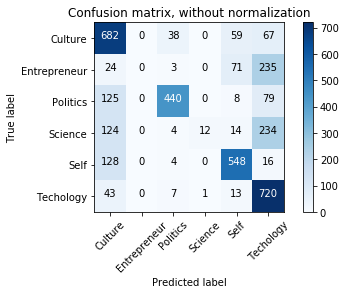

<Figure size 432x288 with 0 Axes>

             precision    recall  f1-score   support

          0       0.61      0.81      0.69       846
          1       0.00      0.00      0.00       333
          2       0.89      0.67      0.77       652
          3       0.92      0.03      0.06       388
          4       0.77      0.79      0.78       696
          5       0.53      0.92      0.67       784

avg / total       0.65      0.65      0.59      3699



C:\Users\Keerthana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [110]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
cnf_matrix = confusion_matrix(Y_test, predicted)
plot_confusion_matrix(cnf_matrix, classes=['Culture','Entrepreneur','Politics','Science','Self','Techology'],
                      title='Confusion matrix, without normalization')
plt.figure()
plt.show()
print(metrics.classification_report(Y_test, predicted))

In [111]:
from sklearn import tree
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                      ('clf', tree.DecisionTreeClassifier())
                    ])
text_clf.fit(X_train, Y_train) 
predicted = text_clf.predict(X_test)

print(metrics.confusion_matrix(Y_test, predicted))
print(np.mean(predicted == Y_test))

[[386  23 152  42 168  75]
 [ 35 143  11  10  41  93]
 [139   7 391  24  35  56]
 [ 62   9  33 183  35  66]
 [141  36  29  23 438  29]
 [ 89  59  69  72  46 449]]
0.5379832387131657


In [113]:
from sklearn.ensemble import RandomForestClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                      ('clf', RandomForestClassifier())
                    ])
text_clf.fit(X_train, Y_train) 
predicted = text_clf.predict(X_test)

print(metrics.confusion_matrix(Y_test, predicted))
print(np.mean(predicted == Y_test))

[[448  21 128  24 153  72]
 [ 50 113   8   1  70  91]
 [116   1 427   8  48  52]
 [ 76   2  26 180  24  80]
 [151  25  19   7 473  21]
 [ 90  37  70  58  47 482]]
0.5739389024060557


Confusion matrix, without normalization
[[448  21 128  24 153  72]
 [ 50 113   8   1  70  91]
 [116   1 427   8  48  52]
 [ 76   2  26 180  24  80]
 [151  25  19   7 473  21]
 [ 90  37  70  58  47 482]]


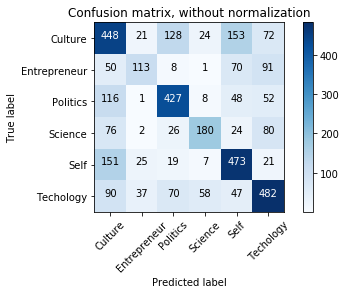

<Figure size 432x288 with 0 Axes>

             precision    recall  f1-score   support

          0       0.48      0.53      0.50       846
          1       0.57      0.34      0.42       333
          2       0.63      0.65      0.64       652
          3       0.65      0.46      0.54       388
          4       0.58      0.68      0.63       696
          5       0.60      0.61      0.61       784

avg / total       0.58      0.57      0.57      3699



In [114]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
cnf_matrix = confusion_matrix(Y_test, predicted)
plot_confusion_matrix(cnf_matrix, classes=['Culture','Entrepreneur','Politics','Science','Self','Techology'],
                      title='Confusion matrix, without normalization')
plt.figure()
plt.show()
print(metrics.classification_report(Y_test, predicted))

In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
cnf_matrix = confusion_matrix(Y_test, predicted)
plot_confusion_matrix(cnf_matrix, classes=['Culture','Entrepreneur','Politics','Science','Self','Techology'],
                      title='Confusion matrix, without normalization')
plt.figure()
plt.show()
print(metrics.classification_report(Y_test, predicted))

In [103]:
from sklearn import svm
from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                      ('clf', svm.LinearSVC(C=1.0))
                    ])

In [104]:
text_clf.fit(X_train, Y_train)  

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [105]:
predicted = text_clf.predict(X_test)
 
print(metrics.confusion_matrix(Y_test, predicted))
print(np.mean(predicted == Y_test))

[[575   8 100  21  92  50]
 [ 18 206   5   4  44  56]
 [ 54   1 542   5  15  35]
 [ 28   2   8 299  12  39]
 [ 76  12   9   8 584   7]
 [ 37  32  38  45  13 619]]
0.7637199243038659


In [102]:
print(metrics.classification_report(Y_test, predicted))

             precision    recall  f1-score   support

          0       0.73      0.68      0.70       846
          1       0.79      0.62      0.69       333
          2       0.77      0.83      0.80       652
          3       0.78      0.77      0.78       388
          4       0.77      0.84      0.80       696
          5       0.77      0.79      0.78       784

avg / total       0.76      0.76      0.76      3699



Confusion matrix, without normalization
[[575   8 100  21  92  50]
 [ 18 206   5   4  44  56]
 [ 54   1 542   5  15  35]
 [ 28   2   8 299  12  39]
 [ 76  12   9   8 584   7]
 [ 37  32  38  45  13 619]]


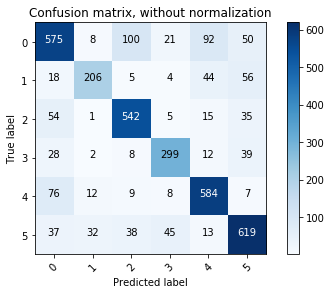

<Figure size 432x288 with 0 Axes>

In [106]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, classification_report
cnf_matrix = confusion_matrix(Y_test, predicted)
plot_confusion_matrix(cnf_matrix, classes= ['0','1','2','3','4','5'],
                      title='Confusion matrix, without normalization')
plt.figure()
plt.show()